In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from scipy.stats import truncnorm

In [25]:
def generate_timeseries(length, with_sin=False, sin_height_adjust=None):
    SIN_LENGTH_RATIO = 0.2
    timeseries = np.random.normal(0, 100, length)
    timeseries_info = (None, None, None) 

    if with_sin:
        sin_length = int(length*SIN_LENGTH_RATIO)
        t = np.linspace(0, 4*np.pi, sin_length)
        sine_wave = 30 * np.sin(t)
        sine_wave += sin_height_adjust
        patch_start = np.random.randint(0, length - len(t))
        patch_end = patch_start + len(t)
        timeseries[patch_start:patch_end] = sine_wave
        timeseries_info = (patch_start, patch_end, sin_height_adjust)

    return np.concatenate((timeseries, np.array(timeseries_info)))

In [3]:
def get_truncated_normal(len, mean=0.5, sd=.2, low=0, upp=1):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd).rvs(len)

In [12]:
def generate_dataset(ts_len, total, sin_n, sin_noise, randomize_sin_height=False):
    random_timeseries = [
        generate_timeseries(ts_len)
        for _ in range(total-sin_n)
    ]

    synthetic_error = get_truncated_normal(len=total-sin_n, mean=0.5, sd=0.1, low=0, upp=1)
    random_labels = np.c_[ synthetic_error, np.full((total-sin_n,), False) ]
    random_data = np.c_[ np.array(random_timeseries), random_labels]

    sin_height_normal = np.random.normal(0, 50, sin_n)
    
    sine_patch_timeseries = [
        generate_timeseries(ts_len, with_sin=True, sin_height_adjust=sin_height_normal[i]) 
        for i in range(sin_n)
    ]

    sine_synth_error = get_truncated_normal(len=sin_n, mean=0.9, sd=0.05, low=0, upp=1)
    sine_labels = np.c_[ sine_synth_error, np.full((sin_n,), True) ]
    sine_data = np.c_[ np.array(sine_patch_timeseries), sine_labels ] 

    full_data = np.r_[ random_data, sine_data ]
    columns = list(range(0, ts_len)) + ['sin_x0', 'sin_x1', 'sin_y', 'error', 'label']
    return pd.DataFrame(full_data, columns=columns)

In [13]:
def plot_random_series_helper(df):
    random_row = df.sample()
    datapoints = random_row.drop(columns=['label', 'error'])
    plt.plot(datapoints.values.flatten())
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.show()

In [14]:
def plot_error_distributions(df):
    bins = np.linspace(0, 1, 50)
    plt.hist(df[df['label']==0]['error'], bins, alpha=0.5, label='sin=false')
    plt.hist(df[df['label']==1]['error'], bins, alpha=0.5, label='sin=true')
    plt.legend(loc='upper right')
    plt.show()

### FIXED-Y, NO NOISE
200 series, half with sin

In [15]:
df = generate_dataset(ts_len=150, total=500, sin_n=250, sin_noise=False)

In [18]:
df[df.label==1].head(10)

,0,1,2,3,4,5,6,7,8,9,...,145,146,147,148,149,sin_x0,sin_x1,sin_y,error,label
250,-8.662376,-50.751003,107.347081,-121.054512,3.415262,18.597007,-25.721656,-19.926533,-26.378985,230.456961,...,-3.962165,2.079473,12.347661,24.944334,-4.403642,119.0,149.0,24.944334,0.84993,1.0
251,141.961864,14.962001,104.786243,-70.713326,-45.228405,-125.993983,-118.171672,52.562232,-2.992719,-16.414732,...,61.574572,76.313011,-3.924211,-266.915995,129.746432,66.0,96.0,76.042102,0.904821,1.0
252,-11.072199,8.680695,11.358643,10.902099,41.373578,74.118789,46.487496,-179.551178,56.703299,36.563173,...,-6.350912,80.521842,5.160842,150.509354,-104.951603,61.0,91.0,-3.934771,0.890086,1.0
253,102.30738,130.364208,167.132478,199.017806,54.868985,-18.756874,-29.1448,-11.872301,4.283452,-39.850412,...,51.531588,25.66732,-55.687147,7.869706,79.510569,10.0,40.0,5.404289,0.92443,1.0
254,-45.158731,-199.706583,108.398895,15.991071,86.042269,1.485255,-64.034578,78.86216,-88.338909,59.823667,...,-42.251164,-67.904251,149.835822,-75.583134,-10.113267,50.0,80.0,15.481997,0.960112,1.0
255,-101.458625,85.551888,-56.694001,-41.219921,-52.416875,70.55636,102.492988,13.980277,20.961239,-20.908491,...,-20.355041,-45.795722,94.8216,50.5824,-242.075653,98.0,128.0,-3.946258,0.775304,1.0
256,58.843545,25.877637,10.237786,49.247966,34.754356,24.958847,-60.152293,-76.72776,-23.274797,60.643287,...,-77.674022,141.528924,144.455189,149.276025,-48.852769,21.0,51.0,1.192822,0.886085,1.0
257,141.631597,13.404215,98.628417,-109.68817,-216.125885,-28.382271,25.222883,49.502992,39.865686,2.997871,...,46.022737,-79.953321,69.304125,118.787879,122.850164,76.0,106.0,44.603784,0.868503,1.0
258,45.909187,185.194124,18.574629,125.46087,-12.078337,63.533019,-58.047903,60.141323,49.436991,-16.838695,...,70.782027,134.325793,28.29314,57.08302,-61.639265,50.0,80.0,-63.923661,0.926186,1.0
259,-18.197034,-66.028971,94.098453,-124.859291,-75.28918,-8.231734,-41.86489,-49.591873,193.487621,9.498599,...,-146.153071,245.091534,-117.405917,39.023577,114.576919,61.0,91.0,-42.022437,0.887435,1.0


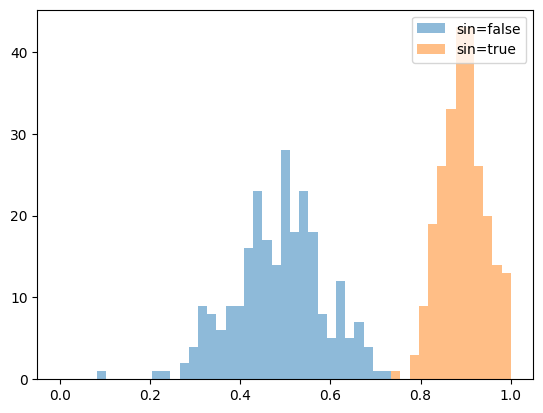

In [66]:
plot_error_distributions(df_no_noise)

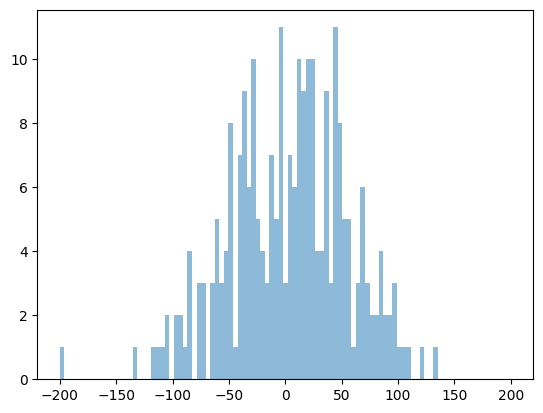

In [67]:
bins = np.linspace(-200, 200, 100)
_ = plt.hist(df[df['label']==1].sin_y, bins, alpha=0.5)

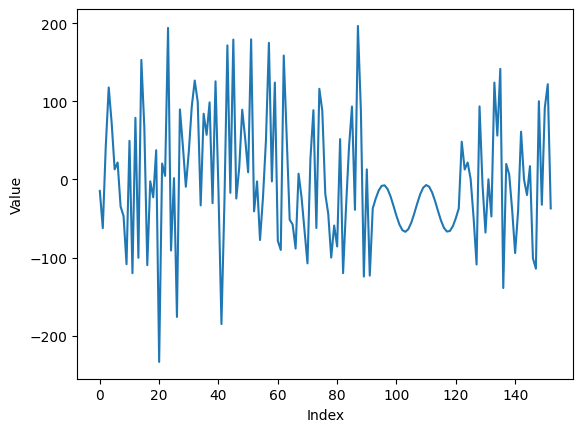

In [120]:
plot_random_series_helper(df=df[df['label']==1])

In [121]:
df.to_csv('./sin_synth/SIN_NORMAL_500.csv', index=False)